Import the necessary add-ons

In [1]:
import pandas as pd
# import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
# from scipy import stats

Set up a few lists and define some functions that will make later processes easier

In [2]:
# creates the list of column names to clean the data

data_columns = ['tripduration',
                'starttime',
                'stoptime',
                'start_station_id',
                'start_station_name',
                'start_station_latitude',
                'start_station_longitude',
                'end_station_id',
                'end_station_name',
                'end_station_latitude',
                'end_station_longitude',
                'bikeid',
                'usertype',
                'birth year',
                'gender']


In [3]:
# creates function to ingest and clean file
def load_bike_data(x):
    df1 = pd.read_csv(x)
    df1.columns = data_columns
    return df1


In [4]:
# creates a list of the files including year and month
files_to_use = [("201601-citibike-tripdata.csv", 2016, 1),
                ("201602-citibike-tripdata.csv", 2016, 2),
                ("201603-citibike-tripdata.csv", 2016, 3),
                ("201604-citibike-tripdata.csv", 2016, 4),
                ("201605-citibike-tripdata.csv", 2016, 5),
                ("201606-citibike-tripdata.csv", 2016, 6),
                ("201607-citibike-tripdata.csv", 2016, 7),
                ("201608-citibike-tripdata.csv", 2016, 8),
                ("201609-citibike-tripdata.csv", 2016, 9),
                ("201610-citibike-tripdata.csv", 2016, 10),
                ("201611-citibike-tripdata.csv", 2016, 11),
                ("201612-citibike-tripdata.csv", 2016, 12),
                ("201701-citibike-tripdata.csv", 2017, 1),
                ("201702-citibike-tripdata.csv", 2017, 2),
                ("201703-citibike-tripdata.csv", 2017, 3),
                ("201704-citibike-tripdata.csv", 2017, 4),
                ("201705-citibike-tripdata.csv", 2017, 5),
                ("201706-citibike-tripdata.csv", 2017, 6),
                ("201707-citibike-tripdata.csv", 2017, 7),
                ("201708-citibike-tripdata.csv", 2017, 8),
                ("201709-citibike-tripdata.csv", 2017, 9),
                ("201710-citibike-tripdata.csv", 2017, 10),
                ("201711-citibike-tripdata.csv", 2017, 11),
                ("201712-citibike-tripdata.csv", 2017, 12)
                ]


Create a scatterplot of trips vs the month and year they occurred during

In [5]:
# create a dataframe with the aggregated year and month data by count of trips and mean trip duration
temp_list = []
for file in files_to_use:
    y = pd.DataFrame(load_bike_data(file[0]))
    y['year'] = file[1]
    y['month'] = file[2]
    temp_list.append([y.year.max(), y.month.max(),
                     y.tripduration.count(), y.tripduration.mean()])

trip_count = pd.DataFrame(
    temp_list, columns=['year', 'month', 'total_trips', 'avg_trip_duration'],)



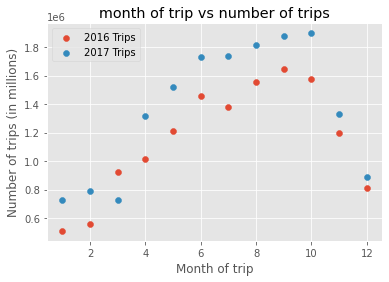

In [6]:
# creates scatterplot with trip month vs number of trips
trips_2016 = trip_count.loc[trip_count['year'] == 2016]
trips_2017 = trip_count.loc[trip_count['year'] == 2017]

plt.scatter(trips_2016['month'],
            y=trips_2016['total_trips'], label="2016 Trips")
plt.scatter(trips_2017['month'],
            y=trips_2017['total_trips'], label="2017 Trips")

plt.title('month of trip vs number of trips')
plt.xlabel('Month of trip')
plt.ylabel('Number of trips (in millions)')
plt.legend()

plt.show()


In [7]:
# creates scatterplot with trips per month vs number of trips subdivided by customer type
trips_by_cust_type = pd.DataFrame()
for file in files_to_use:
    y = pd.DataFrame(load_bike_data(file[0]))
    y['year'] = file[1]
    y['month'] = file[2]
    y_grouped = y.groupby(['year', 'month', 'usertype'])[
        'tripduration'].agg(['count', 'mean'])
    y_grouped.columns = ['number_of_trips', 'avg_trip_duration']
    y_grouped = y_grouped.reset_index()
    trips_by_cust_type = pd.concat([trips_by_cust_type,y_grouped],axis=0,ignore_index=True)


In [8]:
# creates a function to count the number of trips by year and by customer type
def trips_by_cust(x,y):
    y = trips_by_cust_type.loc[(trips_by_cust_type['year'] == x) & (trips_by_cust_type['usertype'] == y)]
    return y

In [9]:
# implements the function created above
trips_by_cust_type_2016_sub = trips_by_cust(2016,'Subscriber')
trips_by_cust_type_2016_ns = trips_by_cust(2016,'Customer')
trips_by_cust_type_2017_sub = trips_by_cust(2017,'Subscriber')
trips_by_cust_type_2017_ns = trips_by_cust(2017,'Customer')

In [10]:
# creates a function to plot the number of trips by year and customer tyope
def scatter_plot(x,y,z):
    plt.scatter(trips_by_cust_type_2016_sub['month'],
                y=trips_by_cust_type_2016_sub[x], label="2016 Subscriber Trips")
    plt.scatter(trips_by_cust_type_2016_ns['month'],
                y=trips_by_cust_type_2016_ns[x], label="2016 Non-Subscriber Trips")
    plt.scatter(trips_by_cust_type_2017_sub['month'],
                y=trips_by_cust_type_2017_sub[x], label="2017 Subscriber Trips")
    plt.scatter(trips_by_cust_type_2017_ns['month'],
                y=trips_by_cust_type_2017_ns[x], label="2017 Non-Subscriber Trips")

    plt.title(y)
    plt.xlabel('Month of trip')
    plt.ylabel(z)
    plt.legend(bbox_to_anchor=(1.0, 1.0))

    plt.show()


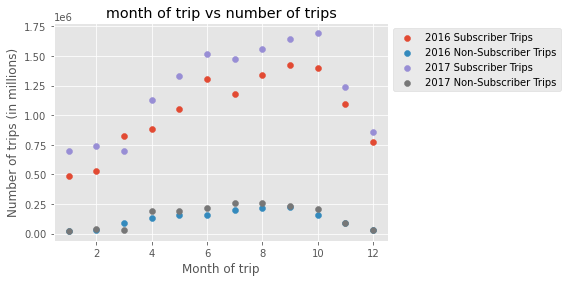

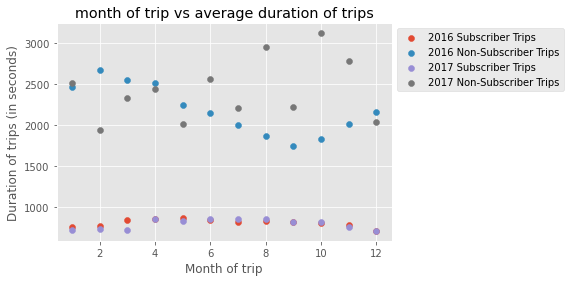

In [11]:
scatter_plot('number_of_trips','month of trip vs number of trips','Number of trips (in millions)')
scatter_plot('avg_trip_duration','month of trip vs average duration of trips','Duration of trips (in seconds)')


Generate Bar Charts examining the duration of trips by customer types

In [12]:
#creates a function to generate a dataframe with a list of either subscriber or customer trip durations
def trip_duration_by_user(x):
    trip_durations = pd.DataFrame()
    for file in files_to_use:
        y = pd.DataFrame(load_bike_data(file[0]))
        y = y.loc[(y['usertype'] == x)]
        durations = y[['tripduration']]
        trip_durations = pd.concat([trip_durations,durations],axis=0,ignore_index=True)
    return trip_durations

In [13]:
# implements the trip_duration_by_user functions
subscriber_durations = trip_duration_by_user("Subscriber")
customer_durations = trip_duration_by_user("Customer")

In [14]:
# creates a function to categorize trips by duration
def trip_length(row):
    if row['tripduration'] <= 900:
        return '15 minutes or less'
    if row['tripduration'] <= 1800:
        return '16-30 minutes'
    if row['tripduration'] <= 2700:
        return '31-45 minutes'
    if row['tripduration'] > 2700:
        return 'More than 45 minutes'
    else:
        return 0

In [15]:
# Creates a chart of the time each trip takes
subscriber_durations['trip_length'] = subscriber_durations.apply(lambda row: trip_length(row), axis=1)
customer_durations['trip_length'] = customer_durations.apply(lambda row: trip_length(row), axis=1)


In [16]:
def sort_results(y):
    x = y['trip_length'].value_counts(normalize=True)
    x = pd.DataFrame(x)
    order = ['15 minutes or less','16-30 minutes','31-45 minutes','More than 45 minutes']
    x2 = x.reindex(order)
    return x2

                      trip_length
15 minutes or less       0.723972
16-30 minutes            0.219827
31-45 minutes            0.047595
More than 45 minutes     0.008606


Text(0.5, 1.0, 'Percent of Rides by Duration for Subscribers')

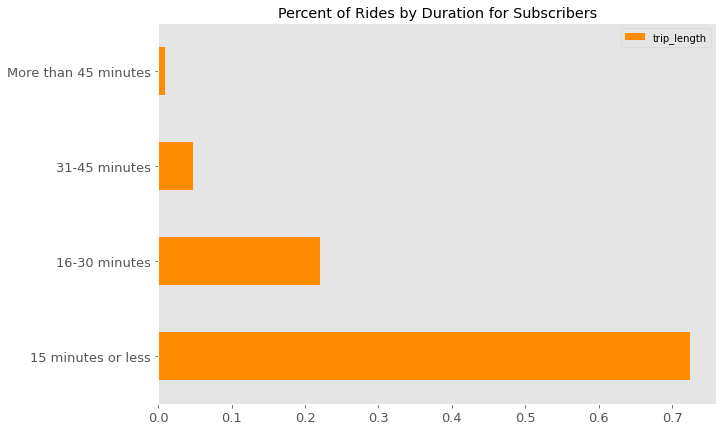

In [17]:
# creates the subscriber chart
subscriber_times = sort_results(subscriber_durations)
print(subscriber_times)
subscriber_times.plot(kind='barh', grid=0, figsize=(10,7), color=['darkorange', 'orange', 'sandybrown', 'peachpuff', 'navajowhite', 'bisque'], fontsize=13)
plt.title('Percent of Rides by Duration for Subscribers')

                      trip_length
15 minutes or less       0.280811
16-30 minutes            0.491563
31-45 minutes            0.132761
More than 45 minutes     0.094864


Text(0.5, 1.0, 'Percent of Rides by Duration for Non-Subscribers')

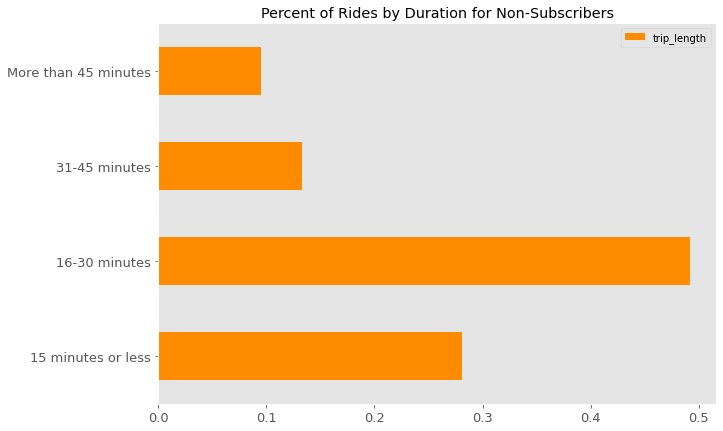

In [18]:
# creates the customer chart
customer_times = sort_results(customer_durations)
print(customer_times)
customer_times.plot(kind='barh', grid=0, figsize=(10,7), color=['darkorange', 'orange', 'sandybrown', 'peachpuff', 'navajowhite', 'bisque'], fontsize=13)
plt.title('Percent of Rides by Duration for Non-Subscribers')

Examine the revenue generated by each customer type


In [19]:
# if the type is subscriber - if trip is <=45 minutes (2700) then included; if trip is >45 min then $0.15/minute
# if the type is non-subscriber - if trip is <=30 minutes (1800) then included; if trip is >30 then $0.23/minute

def current_revenue_trip(row):
    if row['usertype'] == 'Subscriber':
        if row['tripduration'] <= 2700:
            return 0
        if row['tripduration'] > 2700:
            return (np.ceil((row['tripduration']-2700)/60)*0.15)
    if row['usertype'] == 'Customer':
        if row['tripduration'] <= 1800:
            return 0
        if row['tripduration'] > 1800:
            return (np.ceil(((row['tripduration']-1800)/60)*0.23))
    else:
        return 0


In [20]:
# test if a slightly adjusted revenue model would work
# would have to AB test the plan before wide roll-out
def new_revenue_trip(row):
    if row['usertype'] == 'Subscriber':
        if row['tripduration'] <= 2700:
            return 0
        if row['tripduration'] > 2700:
            return (np.ceil((row['tripduration']-2700)/60)*0.17)
    if row['usertype'] == 'Customer':
        if row['tripduration'] <= 1800:
            return 0
        if row['tripduration'] > 1800:
            return (np.ceil(((row['tripduration']-1800)/60)*0.25))
    else:
        return 0

In [21]:
# Create a chart of the revenue per trip
# calculate the revenue per trip using the functions created above
revenue_per_trip = pd.DataFrame()
customer_count = 0
for file in files_to_use:
    y = pd.DataFrame(load_bike_data(file[0]))
    y['year'] = file[1]
    y['month'] = file[2]
    y = y[['tripduration','usertype']]
    y['over_time_fee'] = y.apply(lambda row: current_revenue_trip(row), axis=1)
    y['over_time_fee_new'] = y.apply(lambda row: new_revenue_trip(row), axis=1)
    revenue_per_trip = pd.concat([revenue_per_trip,y],axis=0,ignore_index=True)
    z = y.loc[(y['usertype'] == 'Customer')]
    customer_count = customer_count+z['usertype'].count()


    revenue_per_trip_grouped = revenue_per_trip.groupby(['usertype']).agg({'over_time_fee':['sum'],'over_time_fee_new':['sum']})
    revenue_per_trip_grouped.columns = ['over_time_fee','increased_over_time_fee']
    revenue_per_trip_grouped = revenue_per_trip_grouped.reset_index()


In [22]:
revenue_per_trip_grouped['user_fees'] = (customer_count*3.99,(136702*185)*2)
revenue_per_trip_grouped

,usertype,over_time_fee,increased_over_time_fee,user_fees
0,Customer,13905054.0,15076050.00,13077209.04
1,Subscriber,5378897.4,6096083.72,50579740.00


     usertype  over_time_fee  increased_over_time_fee    user_fees
0    Customer     13905054.0              15076050.00  13077209.04
1  Subscriber      5378897.4               6096083.72  50579740.00


Text(0, 0.5, 'Customer Group')

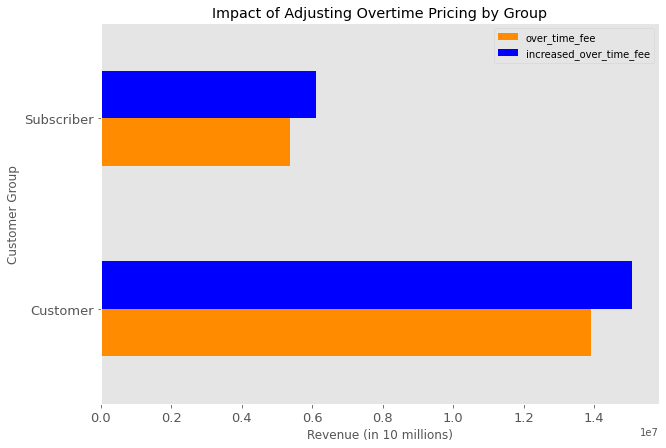

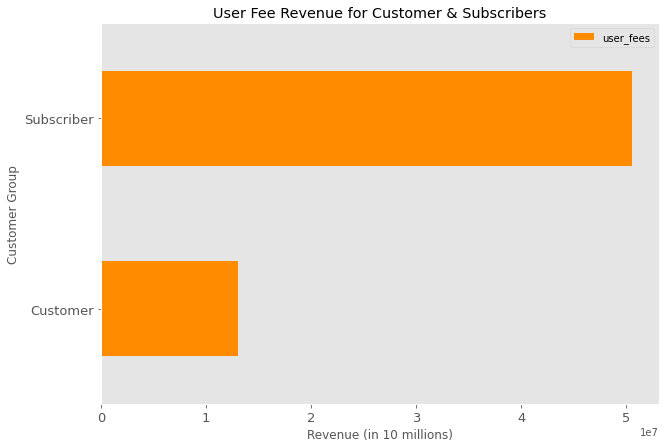

In [23]:
print(revenue_per_trip_grouped)
chart_data = revenue_per_trip_grouped.drop('user_fees',axis=1)
chart_data.set_index('usertype',inplace=True)
chart_data.plot(kind='barh', grid=0, figsize=(10,7), color=['darkorange', 'blue', 'sandybrown', 'peachpuff', 'navajowhite', 'bisque'], fontsize=13)
plt.title('Impact of Adjusting Overtime Pricing by Group')
plt.xlabel('Revenue (in 10 millions)')
plt.ylabel('Customer Group')

chart_data = revenue_per_trip_grouped.drop(['over_time_fee','increased_over_time_fee'],axis=1)
chart_data.set_index('usertype',inplace=True)
chart_data.plot(kind='barh', grid=0, figsize=(10,7), color=['darkorange', 'blue', 'sandybrown', 'peachpuff', 'navajowhite', 'bisque'], fontsize=13)
plt.title('User Fee Revenue for Customer & Subscribers')
plt.xlabel('Revenue (in 10 millions)')
plt.ylabel('Customer Group')
